In [1]:
%pylab inline

plt.rcParams['figure.figsize'] = (2 * 10.0, 8.0)
plt.rcParams['font.size'] = 30


colors = ['#66c2a5','#fc8d62','#8da0cb','#e78ac3','#a6d854','#ffd92f']

Populating the interactive namespace from numpy and matplotlib


In [5]:
import numpy as np
from scipy import sparse
from sklearn.preprocessing import LabelBinarizer
from sklearn.datasets import load_svmlight_file

from lightning.impl.sag import SAGClassifier, SAGAClassifier, get_auto_step_size
from lightning.impl.svrg import SVRGClassifier
from lightning.impl.sgd_fast import Log
from numba import jit



Done SAGAClassifier
Done SAGAClassifier


/Users/fabianpedregosa/anaconda3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


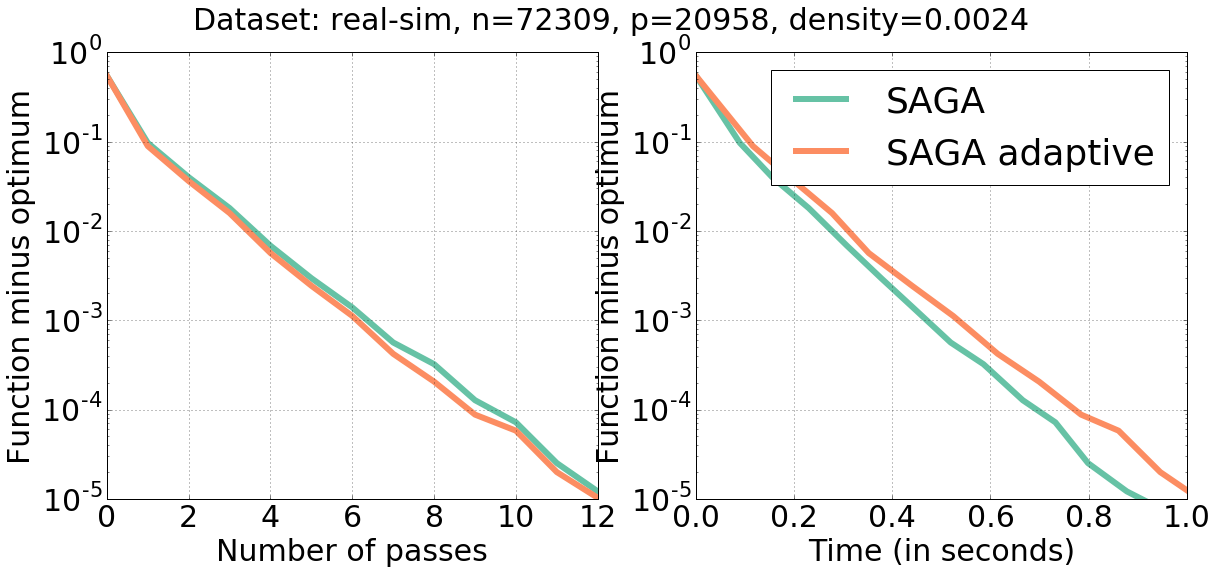

Done SAGAClassifier
Done SAGAClassifier


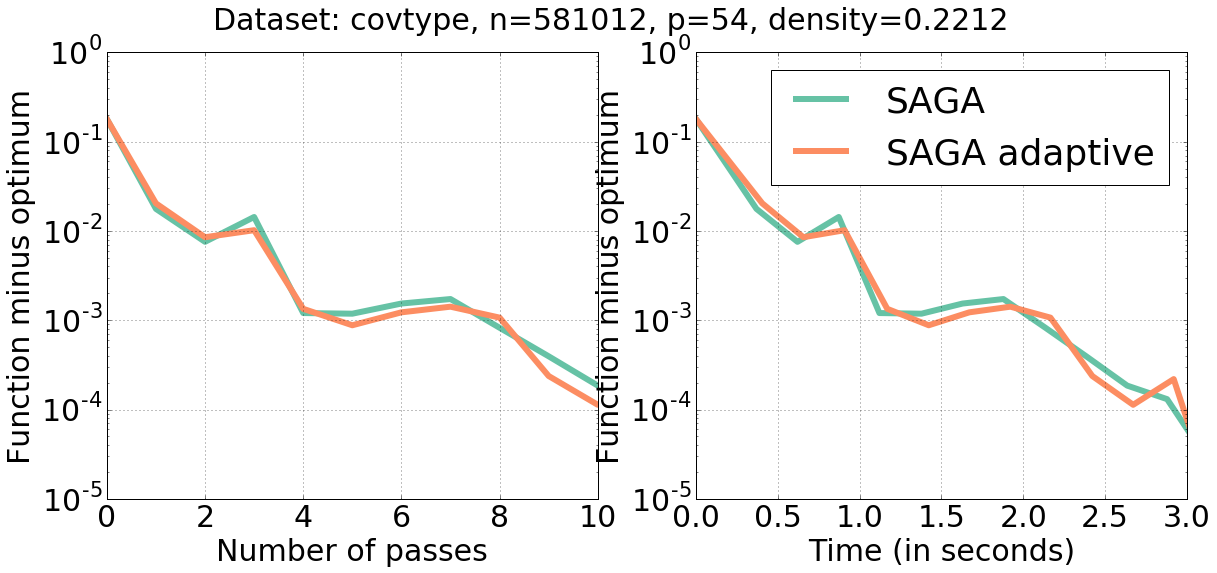

Done SAGAClassifier
Done SAGAClassifier


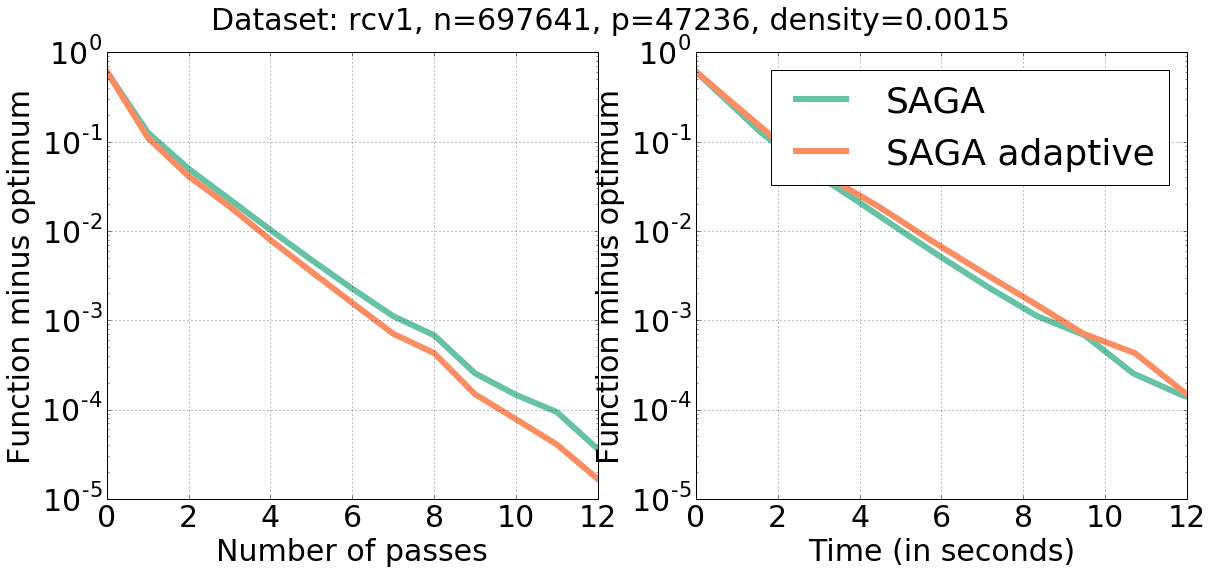

In [3]:

xlims = {'rcv1': 12, 'covtype' : 3, 'real-sim' : 1}
xlims_passes = {'rcv1': 12, 'covtype': 10, 'real-sim': 12}
# loss = 'smooth_hinge'
loss = 'log'


for dataset in ('real-sim', 'covtype', 'rcv1'):
    
    if dataset == 'covtype':
        X, y = load_svmlight_file('/Users/fabianpedregosa/data/async_saga/covtype.libsvm.binary.scale')
        # make y be -1 or +1
        y[y > 1 ] = -1
    elif dataset == 'rcv1':
        X, y = load_svmlight_file('/Users/fabianpedregosa/data/async_saga/rcv1_full.binary')
    elif dataset == 'real-sim':
        X, y = load_svmlight_file('/Users/fabianpedregosa/data/async_saga/real-sim')
    else:
        raise NotImplementedError


    alpha = 1.0 / X.shape[0]
    max_iter = 20
    # step sizes are choosen as the ones that yield the fastest decrease

    from datetime import datetime
    coefs_saga_adaptive = [np.zeros(X.shape[1])]
    start_adaptive = datetime.now()
    times_saga_adaptive = [0.]

    def callback_adaptive(clf):
        coefs = clf.coef_scale_[0] * clf.coef_.ravel().copy()
        coefs_saga_adaptive.append(coefs)
        times_saga_adaptive.append((datetime.now() - start_adaptive).total_seconds())

    @jit
    def compute_loss(lf, coefs):
        loss = 0.0
        pred = X.dot(coefs)
        for i in range(X.shape[0]):
            loss += lf.loss(pred[i], y[i])
        full_loss = loss / float(X.shape[0]) + 0.5 * alpha * coefs.dot(coefs)
        return full_loss

    clf_saga = SAGAClassifier(
        loss=loss, callback=callback_adaptive, eta='adaptive', max_iter=max_iter, tol=1e-132,
        alpha=alpha, random_state=0)
    clf_saga.fit(X, y)
    loss_saga_adaptive = np.array([compute_loss(clf_saga._get_loss(), w) for w in coefs_saga_adaptive])
    print('Done SAGAClassifier')


    coefs_saga = [np.zeros(X.shape[1])]
    start_saga = datetime.now()
    times_saga = [0.]
    def callback(clf):
        coefs_saga.append(
            clf.coef_scale_[0] * clf.coef_.ravel().copy())
        times_saga.append((datetime.now() - start_saga).total_seconds())

    clf_saga = SAGAClassifier(
        loss=loss, callback=callback, eta='auto', max_iter=max_iter, tol=1e-132,
        alpha=alpha, random_state=0)
    clf_saga.fit(X, y)
    loss_saga = np.array([compute_loss(clf_saga._get_loss(), w) for w in coefs_saga])
    print('Done SAGAClassifier')
    
    fmin = min(np.min(loss_saga), np.min(loss_saga_adaptive))
    f, (ax1, ax2) = plt.subplots(1, 2, sharey=False)
    density = X.nnz / (X.shape[0] * X.shape[1])
    plt.suptitle('Dataset: %s, n=%s, p=%s, density=%.4f' % (dataset, X.shape[0], X.shape[1], density))
    
    lw=6
    ax1.plot(np.array(loss_saga) - fmin, color=colors[0], lw=lw, label='SAGA')
    ax1.plot(np.array(loss_saga_adaptive) - fmin, color=colors[1], lw=lw, label='SAGA adaptive')
    ax1.set_yscale('log')
    ax1.grid()
    ax1.set_xlim((0, xlims_passes[dataset]))
    ax1.set_ylim((1e-5, None))
    plt.legend()
    ax1.set_xlabel('Number of passes')
    ax1.set_ylabel('Function minus optimum')
    

    lw=6
    ax2.plot(times_saga, np.array(loss_saga) - fmin, color=colors[0], lw=lw, label='SAGA')
    ax2.plot(times_saga_adaptive, np.array(loss_saga_adaptive) - fmin, color=colors[1], lw=lw, label='SAGA adaptive')
    ax2.set_yscale('log')
    ax2.grid()
    ax2.set_xlim((0, xlims[dataset]))
    ax2.set_ylim((1e-5, None))
    ax2.set_xlabel('Time (in seconds)')
    ax2.set_ylabel('Function minus optimum')
    plt.gcf().subplots_adjust(left=0.15)
    # plt.savefig('rcv1_comparison.png')
    plt.legend()
    plt.show()

Done SAGAClassifier
Done SAGAClassifier


/Users/fabianpedregosa/anaconda3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


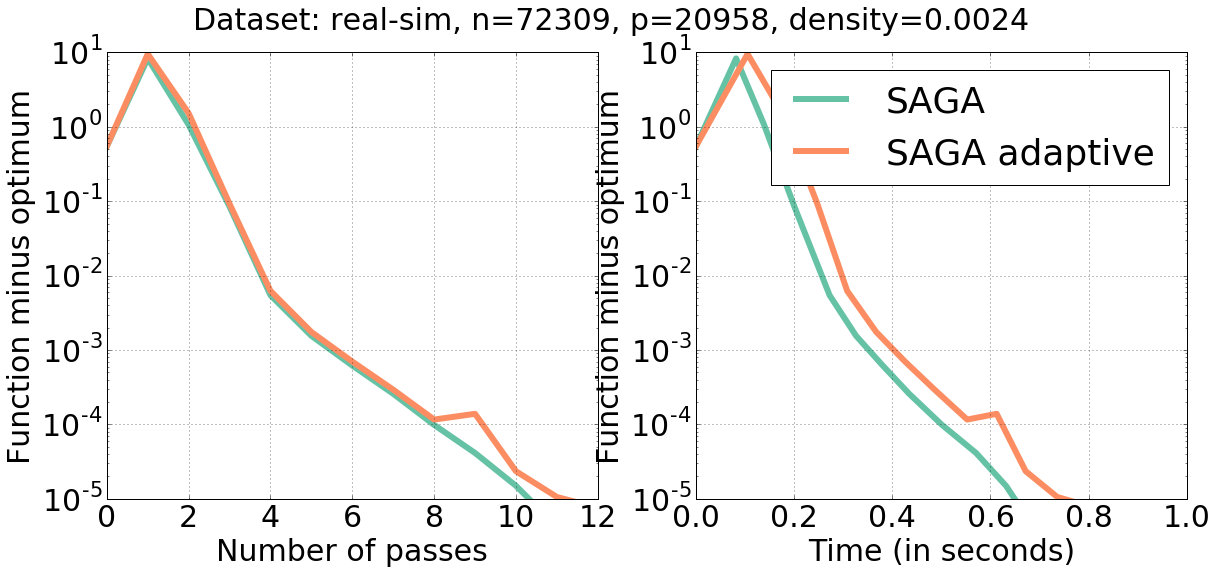

Done SAGAClassifier
Done SAGAClassifier


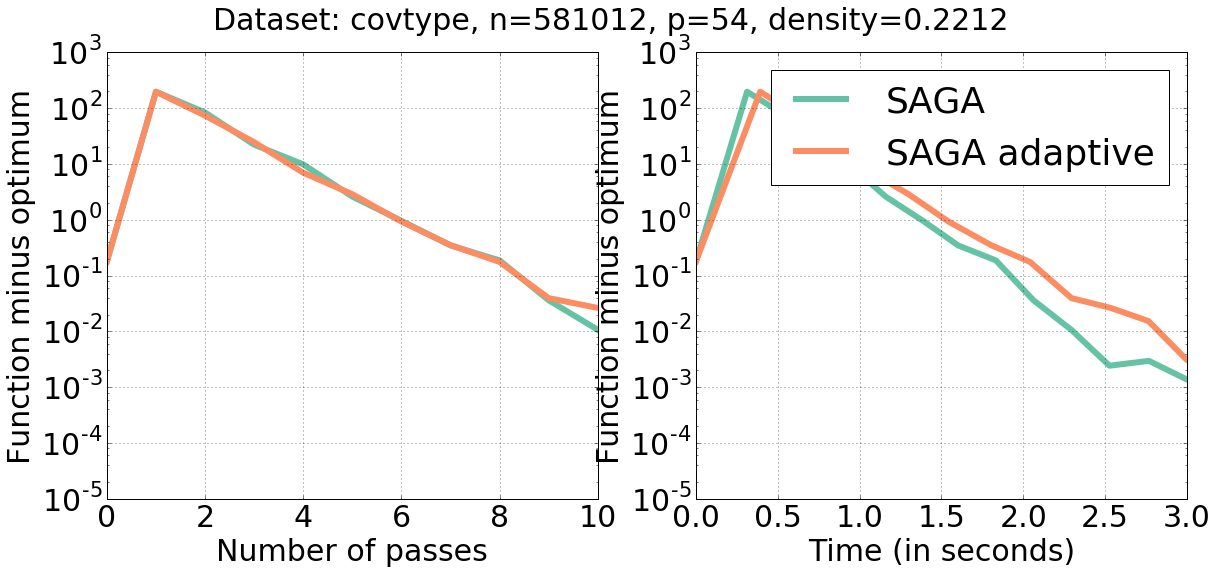

Done SAGAClassifier
Done SAGAClassifier


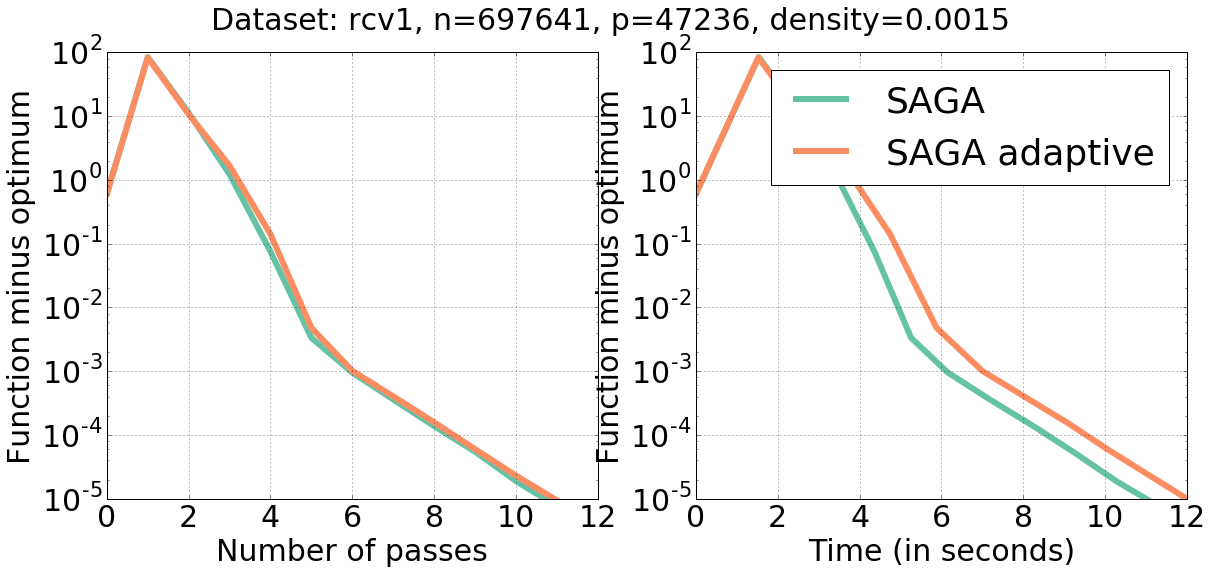

In [6]:

xlims = {'rcv1': 12, 'covtype' : 3, 'real-sim' : 1}
xlims_passes = {'rcv1': 12, 'covtype': 10, 'real-sim': 12}
# loss = 'smooth_hinge'
loss = 'log'


for dataset in ('real-sim', 'covtype', 'rcv1'):
    
    if dataset == 'covtype':
        X, y = load_svmlight_file('/Users/fabianpedregosa/data/async_saga/covtype.libsvm.binary.scale')
        # make y be -1 or +1
        y[y > 1 ] = -1
    elif dataset == 'rcv1':
        X, y = load_svmlight_file('/Users/fabianpedregosa/data/async_saga/rcv1_full.binary')
    elif dataset == 'real-sim':
        X, y = load_svmlight_file('/Users/fabianpedregosa/data/async_saga/real-sim')
    else:
        raise NotImplementedError


    alpha = 1.0 / X.shape[0]
    max_iter = 20
    # step sizes are choosen as the ones that yield the fastest decrease

    from datetime import datetime
    coefs_saga_adaptive = [np.zeros(X.shape[1])]
    start_adaptive = datetime.now()
    times_saga_adaptive = [0.]

    def callback_adaptive(clf):
        coefs = clf.coef_scale_[0] * clf.coef_.ravel().copy()
        coefs_saga_adaptive.append(coefs)
        times_saga_adaptive.append((datetime.now() - start_adaptive).total_seconds())

    @jit
    def compute_loss(lf, coefs):
        loss = 0.0
        pred = X.dot(coefs)
        for i in range(X.shape[0]):
            loss += lf.loss(pred[i], y[i])
        full_loss = loss / float(X.shape[0]) + 0.5 * alpha * coefs.dot(coefs)
        return full_loss

    clf_saga = SAGClassifier(
        loss=loss, callback=callback_adaptive, eta='adaptive', max_iter=max_iter, tol=1e-132,
        alpha=alpha, random_state=0)
    clf_saga.fit(X, y)
    loss_saga_adaptive = np.array([compute_loss(clf_saga._get_loss(), w) for w in coefs_saga_adaptive])
    print('Done SAGClassifier')


    coefs_saga = [np.zeros(X.shape[1])]
    start_saga = datetime.now()
    times_saga = [0.]
    def callback(clf):
        coefs_saga.append(
            clf.coef_scale_[0] * clf.coef_.ravel().copy())
        times_saga.append((datetime.now() - start_saga).total_seconds())

    clf_saga = SAGClassifier(
        loss=loss, callback=callback, eta='auto', max_iter=max_iter, tol=1e-132,
        alpha=alpha, random_state=0)
    clf_saga.fit(X, y)
    loss_saga = np.array([compute_loss(clf_saga._get_loss(), w) for w in coefs_saga])
    print('Done SAGClassifier')
    
    fmin = min(np.min(loss_saga), np.min(loss_saga_adaptive))
    f, (ax1, ax2) = plt.subplots(1, 2, sharey=False)
    density = X.nnz / (X.shape[0] * X.shape[1])
    plt.suptitle('Dataset: %s, n=%s, p=%s, density=%.4f' % (dataset, X.shape[0], X.shape[1], density))
    
    lw=6
    ax1.plot(np.array(loss_saga) - fmin, color=colors[0], lw=lw, label='SAG')
    ax1.plot(np.array(loss_saga_adaptive) - fmin, color=colors[1], lw=lw, label='SAG adaptive')
    ax1.set_yscale('log')
    ax1.grid()
    ax1.set_xlim((0, xlims_passes[dataset]))
    ax1.set_ylim((1e-5, None))
    plt.legend()
    ax1.set_xlabel('Number of passes')
    ax1.set_ylabel('Function minus optimum')
    

    lw=6
    ax2.plot(times_saga, np.array(loss_saga) - fmin, color=colors[0], lw=lw, label='SAG')
    ax2.plot(times_saga_adaptive, np.array(loss_saga_adaptive) - fmin, color=colors[1], lw=lw, label='SAG adaptive')
    ax2.set_yscale('log')
    ax2.grid()
    ax2.set_xlim((0, xlims[dataset]))
    ax2.set_ylim((1e-5, None))
    ax2.set_xlabel('Time (in seconds)')
    ax2.set_ylabel('Function minus optimum')
    plt.gcf().subplots_adjust(left=0.15)
    # plt.savefig('rcv1_comparison.png')
    plt.legend()
    plt.show()